In [2]:
#  STEP 1: Data Cleaning & Preprocessing (Task 1 Proof)

import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/dutta/Desktop/svm breast cancer classification/data/breast-cancer.csv")
print("Initial Shape:", df.shape)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)

# Drop duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print("Shape after dropping duplicates:", df.shape)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop irrelevant columns (if any)
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# Convert categorical target to 0/1
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # M = Malignant, B = Benign
print("\nDiagnosis Value Counts:\n", df['diagnosis'].value_counts())

#  Save cleaned version
df.to_csv("C:/Users/dutta/Desktop/svm breast cancer classification/data/breast_cancer_cleaned.csv", index=False)
print("\n Cleaned data saved to data/breast_cancer_cleaned.csv")


Initial Shape: (569, 32)
Duplicate Rows: 0

Missing Values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int6

C:\Users\dutta\AppData\Local\Temp\ipykernel_10284\3500675403.py:13: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dutta\AppData\Local\Temp\ipykernel_10284\3500675403.py:14: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.savefig("C:/Users/dutta/Desktop/svm breast cancer classification/images/eda_boxplot.png")
c:\Users\dutta\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


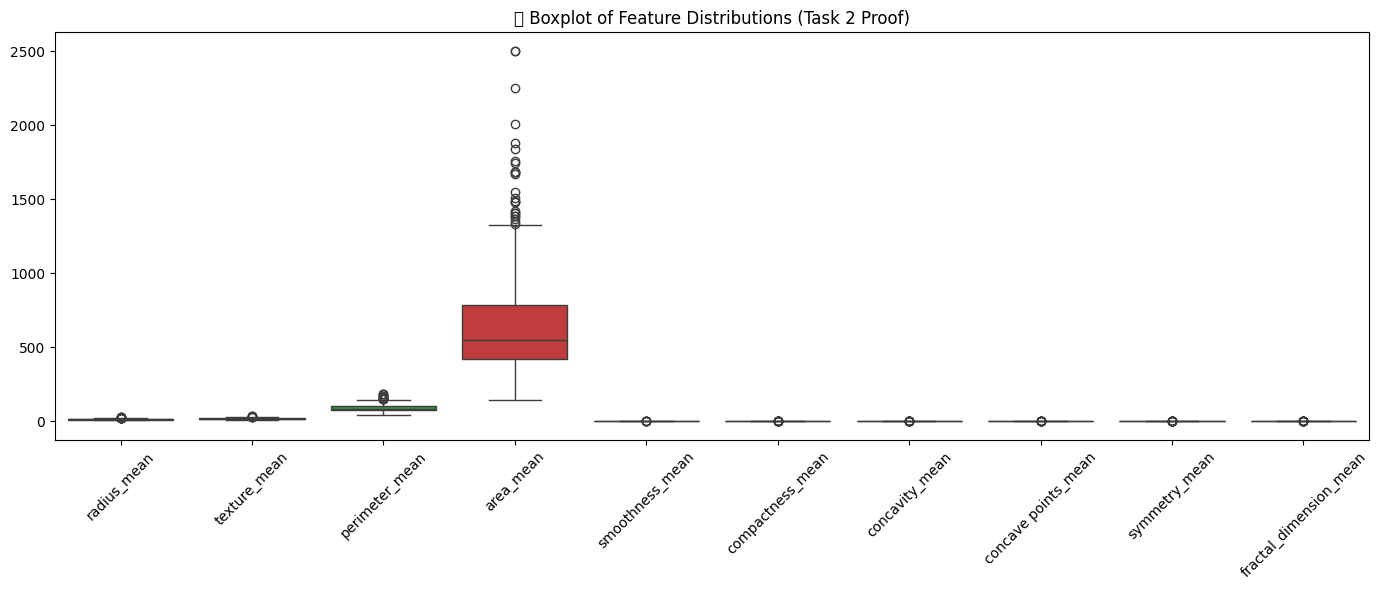

C:\Users\dutta\AppData\Local\Temp\ipykernel_10284\3500675403.py:21: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dutta\AppData\Local\Temp\ipykernel_10284\3500675403.py:22: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.savefig("C:/Users/dutta/Desktop/svm breast cancer classification/images/eda_heatmap.png")
c:\Users\dutta\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


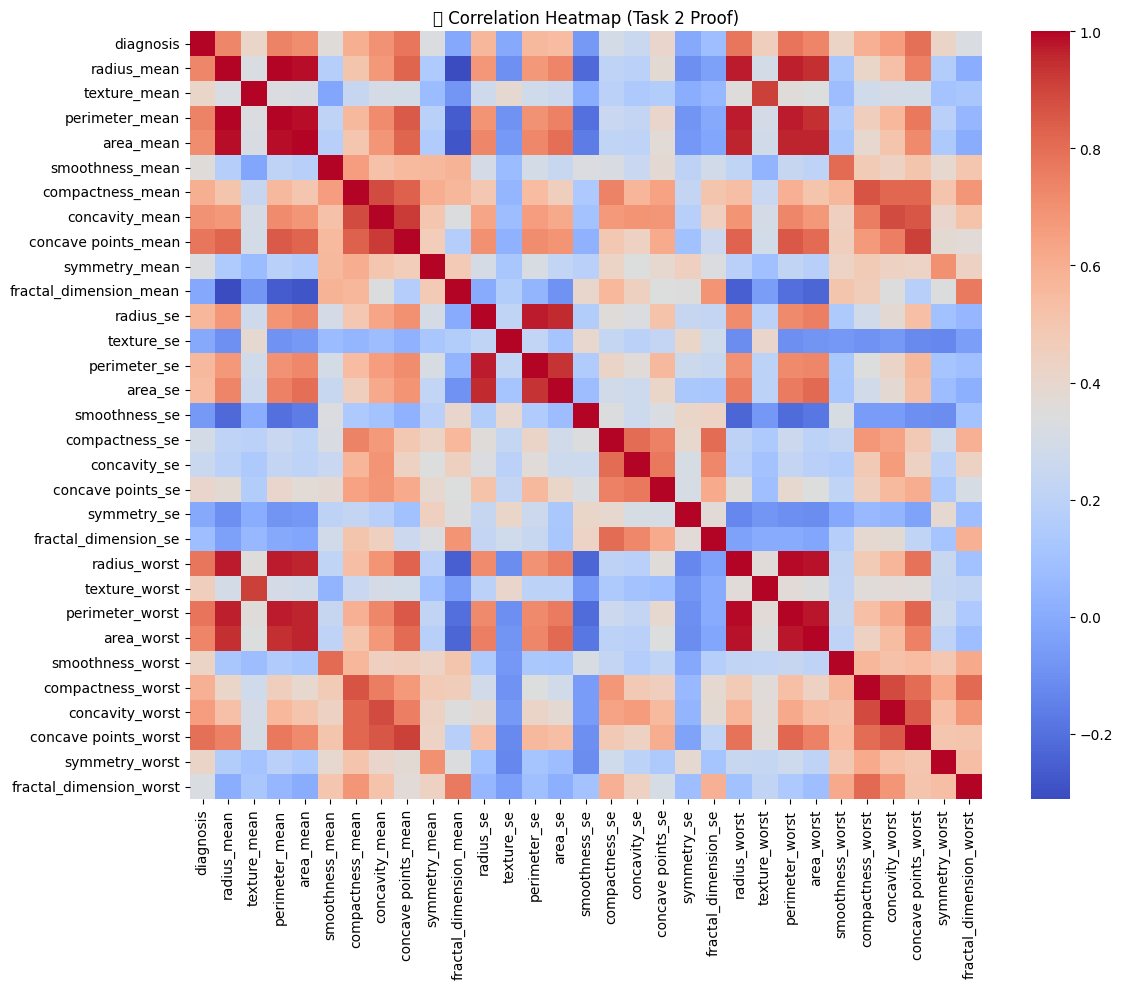

In [3]:
# 📊 STEP 2: Exploratory Data Analysis (Task 2 Proof)
import seaborn as sns
import matplotlib.pyplot as plt

# Reload cleaned data (always good practice)
df = pd.read_csv("C:/Users/dutta/Desktop/svm breast cancer classification/data/breast_cancer_cleaned.csv")

# ✅ Boxplot for all numerical features (first 10 for readability)
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.iloc[:, 1:11])  # Exclude target 'diagnosis'
plt.title("📦 Boxplot of Feature Distributions (Task 2 Proof)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("C:/Users/dutta/Desktop/svm breast cancer classification/images/eda_boxplot.png")
plt.show()

# ✅ Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("🔥 Correlation Heatmap (Task 2 Proof)")
plt.tight_layout()
plt.savefig("C:/Users/dutta/Desktop/svm breast cancer classification/images/eda_heatmap.png")
plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Reload cleaned data
df = pd.read_csv("C:/Users/dutta/Desktop/svm breast cancer classification/data/breast_cancer_cleaned.csv")

# ✅ Encode target column: 'M' = 1 (malignant), 'B' = 0 (benign)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Show mapping
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_map)  # {'B': 0, 'M': 1}

# ✅ Separate features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# ✅ Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("X_scaled shape:", X_scaled.shape)
print("y shape:", y.shape)


Label Mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
X_scaled shape: (569, 30)
y shape: (569,)


 Linear SVM Accuracy: 96.49%
 RBF SVM Accuracy: 97.37%

 Linear SVM Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


 RBF SVM Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



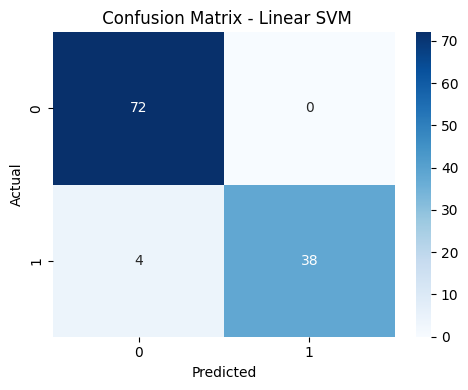

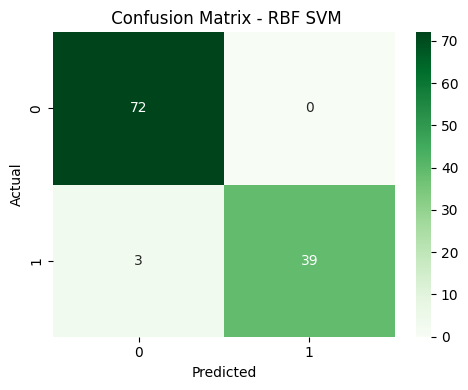

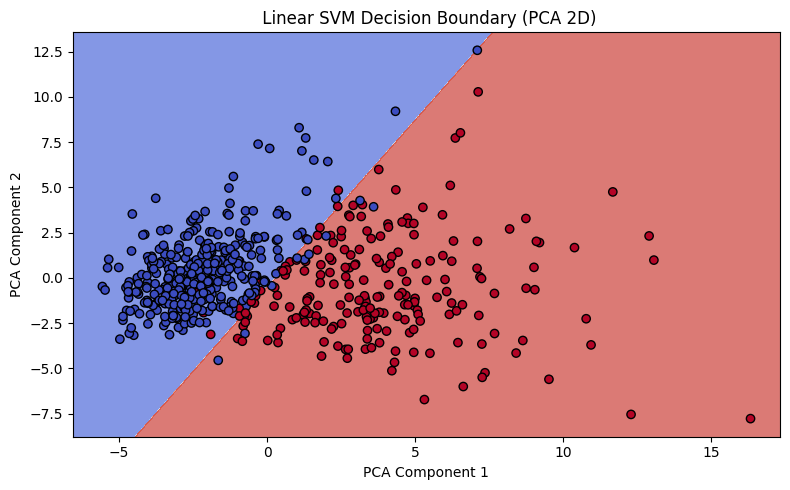

C:\Users\dutta\AppData\Local\Temp\ipykernel_10284\3064306041.py:107: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dutta\AppData\Local\Temp\ipykernel_10284\3064306041.py:108: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.savefig("C:/Users/dutta/Desktop/svm breast cancer classification/images/rbf_svm_pca_boundary.png")
c:\Users\dutta\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


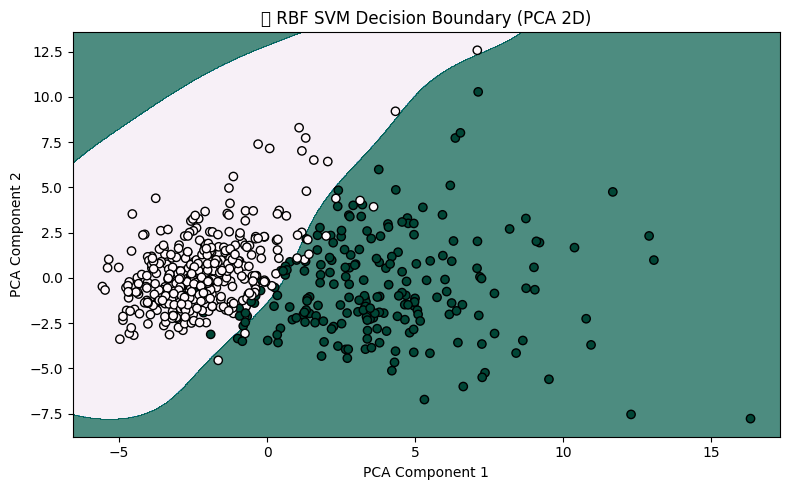

In [11]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

# Initialize models
svm_linear = SVC(kernel='linear', C=1)
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1)

# Fit models
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Predict
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Accuracy
acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print(f" Linear SVM Accuracy: {acc_linear * 100:.2f}%")
print(f" RBF SVM Accuracy: {acc_rbf * 100:.2f}%")

# Classification reports
print("\n Linear SVM Classification Report:\n")
print(classification_report(y_test, y_pred_linear))

print("\n RBF SVM Classification Report:\n")
print(classification_report(y_test, y_pred_rbf))

#  Confusion Matrix - Linear
cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues")
plt.title(" Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("C:/Users/dutta/Desktop/svm breast cancer classification/images/conf_matrix_linear_svm.png")
plt.show()

#  Confusion Matrix - RBF
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Greens")
plt.title(" Confusion Matrix - RBF SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("C:/Users/dutta/Desktop/svm breast cancer classification/images/conf_matrix_rbf_svm.png")
plt.show()

#  Task 7 Visual Proof: Decision Boundary using PCA (2D projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Retrain on PCA data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

model_linear_pca = SVC(kernel='linear', C=1)
model_rbf_pca = SVC(kernel='rbf', C=1)

model_linear_pca.fit(X_train_pca, y_train_pca)
model_rbf_pca.fit(X_train_pca, y_train_pca)

# Create a mesh grid
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot decision boundary for linear SVM
Z_linear = model_linear_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title(" Linear SVM Decision Boundary (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.savefig("C:/Users/dutta/Desktop/svm breast cancer classification/images/linear_svm_pca_boundary.png")
plt.show()

# Plot decision boundary for RBF SVM
Z_rbf = model_rbf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.PuBuGn, alpha=0.7)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.PuBuGn, edgecolors='k')
plt.title("🔮 RBF SVM Decision Boundary (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.savefig("C:/Users/dutta/Desktop/svm breast cancer classification/images/rbf_svm_pca_boundary.png")
plt.show()


Fitting 5 folds for each of 16 candidates, totalling 80 fits


 Best Parameters Found by GridSearchCV:
{'C': 10, 'gamma': 0.01}
Best Accuracy: 97.89%


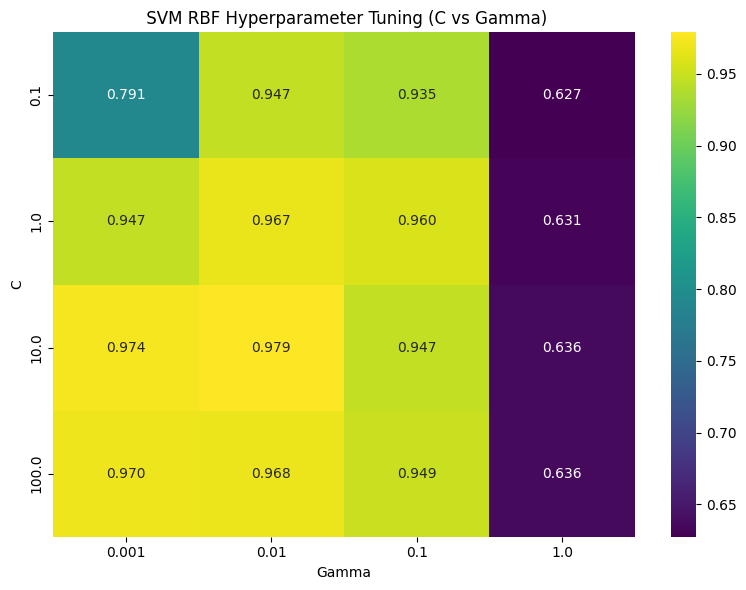

In [14]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Initialize RBF SVM
svm = SVC(kernel='rbf')

# GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_scaled, y)

# Best parameters
print(" Best Parameters Found by GridSearchCV:")
print(grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_ * 100:.2f}%")

# Save results to file
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df[['param_C', 'param_gamma', 'mean_test_score']]
results_df.columns = ['C', 'Gamma', 'Accuracy']
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

# Heatmap visualization
pivot = results_df.pivot(index="C", columns="Gamma", values="Accuracy")
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis")
plt.title(" SVM RBF Hyperparameter Tuning (C vs Gamma)")
plt.tight_layout()
plt.savefig("C:/Users/dutta/Desktop/svm breast cancer classification/images/svm_rbf_tuning_heatmap.png")
plt.show()


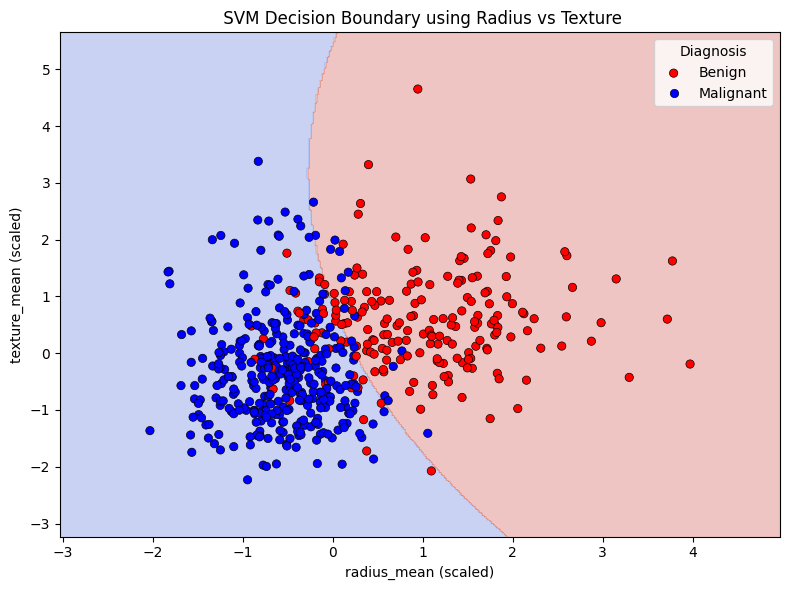

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load cleaned data
df = pd.read_csv("C:/Users/dutta/Desktop/svm breast cancer classification/data/breast_cancer_cleaned.csv")

# Select only two features for 2D visualization
X = df[["radius_mean", "texture_mean"]]
y = df["diagnosis"]

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 'M' becomes 1, 'B' becomes 0

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train SVM with RBF Kernel (best from tuning)
svm = SVC(kernel="rbf", C=10, gamma=0.01)
svm.fit(X_train, y_train)

# Create a meshgrid
h = 0.02  # step size
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict values across the grid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_encoded, palette=["blue", "red"], edgecolor="k")
plt.title(" SVM Decision Boundary using Radius vs Texture")
plt.xlabel("radius_mean (scaled)")
plt.ylabel("texture_mean (scaled)")
plt.legend(title="Diagnosis", labels=["Benign", "Malignant"])
plt.tight_layout()

# Save plot
plt.savefig("C:/Users/dutta/Desktop/svm breast cancer classification/images/decision_boundary.png")
plt.show()
